# Classifying Fashion Clothing items using Tensorflow 2.x

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

####**Tasks to be Performed**

**Problem Statement**
The dataset is similar to MNIST, but includes images of certain clothing and accessory. The objective is to classify images into specific classes using single layer perceptron and multilayer perceptron.

**Dataset Description**
Total Images: 70,000
Train Images: 60,000
Test Images: 10,000
Image Size: 28 X 28
Classes: 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'

**Tasks to be Performed:**
As a part of this assignment you will be performing the following tasks:

> Prepare a detailed python notebook(similar to this one) using muli-layer perceptron for classifing the images from MNIST Fashion Dataset with best accuracy
> Prepare the dataset for the model
> Develop Single Layer Perceptron model for classifying the fashion dataset
> Plot the change in accuracy per epochs
> Evaluate the model on the testing data
> Analyse the model summary
> Add hidden layer to the model to make it Multi-Layer Perceptron
> Add Dropout to prevent overfitting and check its effect on accuracy
> Increasing the number of Hidden Layer neuron and check its effect on accuracy
> Use different optimizers and check its effect on accuracy
> Increase the hidden layers and check its effect on accuracy
> Manipulate the batch_size and epochs and check its effect on accuracy

# Solution: Classifying Fashion Clothing items using Tensorflow 2.x

##Installing TensorFlow 2.x

In [1]:
# !pip install tensorflow

In [2]:
#verify the installation
import tensorflow as tf
from tensorflow import keras 

#Check tf.keras version
print(tf.keras.__version__)


2.4.0


##Preparing the Data

###Loading the Data

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) and convert the samples from integers to floating-point numbers and deal with categorical data:

In [3]:
# Loading MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist 
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
# Data Exploration
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


###Data Preprocessing

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

In [6]:
# X_train is 60000 rows of 28x28 values; we reshape it to # 60000 x 784. 
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED) 
X_test = X_test.reshape(10000, RESHAPED) 

# Data is converted into float32 to use 32-bit precision # when training a neural network 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

# Normalizing the input to be within the range [0,1]
X_train /= 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255
print(X_train.shape[0], 'train samples') 
print(X_test.shape[0], 'test samples') 

# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, 10) 
Y_test = tf.keras.utils.to_categorical(Y_test, 10)


60000 train samples
10000 test samples


## Designing the Model

###Preparing the Model 0: Single layer Perceptron

Build the `Sequential` model with 0 hidden layers. Choose an optimizer and loss function for training:

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_0 = Sequential()
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 10)
model_0.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax')) 

In [8]:
# Compiling the model.
model_0.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Training the model. 
training = model_0.fit(X_train, Y_train, batch_size=64, epochs=70, validation_split=0.2) 

Epoch 1/70
750/750 [==============================] - 2s 3ms/step - loss: 1.0536 - accuracy: 0.6765 - val_loss: 0.7631 - val_accuracy: 0.7571
Epoch 2/70
750/750 [==============================] - 2s 3ms/step - loss: 0.7081 - accuracy: 0.7747 - val_loss: 0.6554 - val_accuracy: 0.7894
Epoch 3/70
750/750 [==============================] - 2s 2ms/step - loss: 0.6348 - accuracy: 0.7965 - val_loss: 0.6084 - val_accuracy: 0.7994
Epoch 4/70
750/750 [==============================] - 2s 2ms/step - loss: 0.5956 - accuracy: 0.8082 - val_loss: 0.5806 - val_accuracy: 0.8078
Epoch 5/70
750/750 [==============================] - 2s 2ms/step - loss: 0.5697 - accuracy: 0.8152 - val_loss: 0.5591 - val_accuracy: 0.8125
Epoch 6/70
750/750 [==============================] - 2s 2ms/step - loss: 0.5511 - accuracy: 0.8216 - val_loss: 0.5446 - val_accuracy: 0.8169
Epoch 7/70
750/750 [==============================] - 2s 2ms/step - loss: 0.5366 - accuracy: 0.8248 - val_loss: 0.5321 - val_accuracy: 0.8205
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


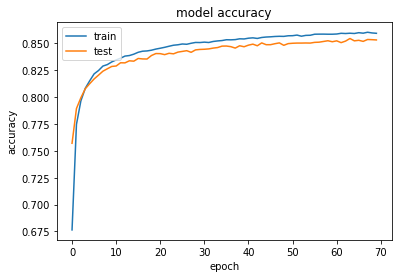

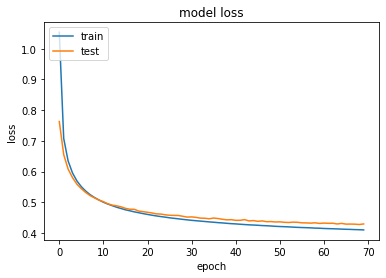

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
#evaluate the model
test_loss, test_acc = model_0.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4564 - accuracy: 0.8392
Test accuracy: 0.8392000198364258


In [12]:
model_0.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f02314c38d0>>

In [13]:
model_0.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'softmax',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 10,
    'use_bias': True}}],
 'name': 'sequential'}

###Improved Model 1: Adding Hidden Layer - Multi Layer Perceptron 

In [14]:
#Most common type of model is a stack of layers
model_1 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_1.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)

# Adding another dense layer:
model_1.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_1.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [15]:
# Compiling the model.
model_1.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Training the model. 
training = model_1.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2) 

Epoch 1/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0066 - accuracy: 0.6773 - val_loss: 0.6649 - val_accuracy: 0.7772
Epoch 2/100
750/750 [==============================] - 2s 2ms/step - loss: 0.6075 - accuracy: 0.7951 - val_loss: 0.5575 - val_accuracy: 0.8069
Epoch 3/100
750/750 [==============================] - 2s 2ms/step - loss: 0.5315 - accuracy: 0.8183 - val_loss: 0.5326 - val_accuracy: 0.8060
Epoch 4/100
750/750 [==============================] - 2s 2ms/step - loss: 0.4962 - accuracy: 0.8285 - val_loss: 0.4864 - val_accuracy: 0.8277
Epoch 5/100
750/750 [==============================] - 2s 2ms/step - loss: 0.4710 - accuracy: 0.8363 - val_loss: 0.4681 - val_accuracy: 0.8349
Epoch 6/100
750/750 [==============================] - 2s 2ms/step - loss: 0.4517 - accuracy: 0.8405 - val_loss: 0.4481 - val_accuracy: 0.8415
Epoch 7/100
750/750 [==============================] - 2s 2ms/step - loss: 0.4360 - accuracy: 0.8475 - val_loss: 0.4410 - val_accuracy: 0.8428

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


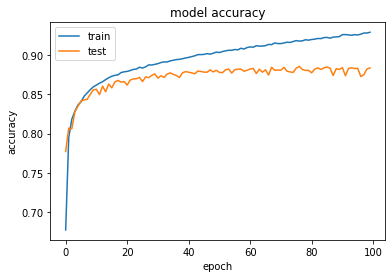

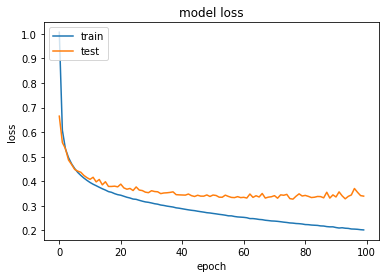

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3634 - accuracy: 0.8778
Test accuracy: 0.8777999877929688


In [19]:
model_1.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f019e2a7438>>

In [20]:
model_1.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[ 0.01969296,  0.07565995,  0.08211032, ..., -0.01981111,
         -0.05984455, -0.06875202],
        [ 0.05037995,  0.01975605, -0.08038424, ...,  0.03693474,
         -0.0526251 ,  0.03977176],
        [ 0.00432234,  0.01668077,  0.03392448, ..., -0.07126558,
         -0.0014259 ,  0.03398204],
        ...,
        [-0.1071687 ,  0.00327581, -0.01389663, ..., -0.0042617 ,
          0.05799195,  0.05908531],
        [ 0.01104763,  0.00471645, -0.05522347, ..., -0.06578352,
         -0.08016527,  0.06238912],
        [-0.0283514 , -0.04722128, -0.03137769, ..., -0.07083987,
         -0.08123336, -0.02291637]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(64,) dtype=float32, numpy=
 array([-7.7510662e-03,  2.5355360e-01, -1.9523827e-04,  1.7191993e-01,
         3.0148289e-01, -7.1015701e-02,  2.2440442e-01,  1.2258463e-01,
         3.1264532e-01,  6.4850979e-02, -1.7931150e-02,  1.6039106e-0

In [21]:
model_1.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 64,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_i

###Improved Model 2 - Adding Dropout to Avoid Overfitting

In [22]:
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_2 = tf.keras.Sequential()
N_hidden = 128
# Adds a densely-connected layer with 64 units to the model:
model_2.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_2.add(Dropout(0.3))
# Adding another dense layer:
model_2.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_2.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_2.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [23]:
# Compiling the model.
model_2.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
# Training the model. 
training = model_2.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2) 

Epoch 1/50
750/750 [==============================] - 2s 3ms/step - loss: 1.2272 - accuracy: 0.5697 - val_loss: 0.7372 - val_accuracy: 0.7402
Epoch 2/50
750/750 [==============================] - 2s 2ms/step - loss: 0.7941 - accuracy: 0.7189 - val_loss: 0.6124 - val_accuracy: 0.7917
Epoch 3/50
750/750 [==============================] - 2s 3ms/step - loss: 0.6896 - accuracy: 0.7594 - val_loss: 0.5538 - val_accuracy: 0.8064
Epoch 4/50
750/750 [==============================] - 2s 3ms/step - loss: 0.6271 - accuracy: 0.7806 - val_loss: 0.5140 - val_accuracy: 0.8151
Epoch 5/50
750/750 [==============================] - 2s 2ms/step - loss: 0.5833 - accuracy: 0.7985 - val_loss: 0.4866 - val_accuracy: 0.8256
Epoch 6/50
750/750 [==============================] - 2s 2ms/step - loss: 0.5576 - accuracy: 0.8048 - val_loss: 0.4709 - val_accuracy: 0.8298
Epoch 7/50
750/750 [==============================] - 2s 2ms/step - loss: 0.5347 - accuracy: 0.8146 - val_loss: 0.4570 - val_accuracy: 0.8342
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


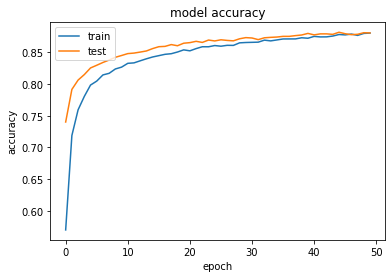

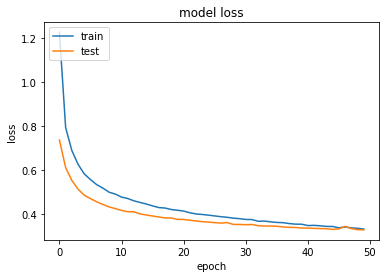

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
#evaluate the model
test_loss, test_acc = model_2.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3547 - accuracy: 0.8723
Test accuracy: 0.8723000288009644


In [27]:
model_2.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f018c2dd278>>

In [28]:
model_2.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[-0.07365213,  0.02258075,  0.05047722, ..., -0.05421382,
         -0.04796609, -0.01833188],
        [-0.00588807, -0.00425569, -0.02408965, ...,  0.07626268,
         -0.02683749,  0.06537206],
        [-0.00190013, -0.07510825, -0.05580442, ..., -0.04341748,
         -0.02531382,  0.04027852],
        ...,
        [-0.0507861 ,  0.06656353,  0.00463152, ..., -0.08109873,
          0.04932264, -0.02387683],
        [ 0.06862386,  0.06012057,  0.03950719, ..., -0.02399752,
          0.03506715, -0.01464315],
        [-0.01112717,  0.05567558,  0.01216848, ..., -0.00291436,
          0.04675768, -0.08075839]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(128,) dtype=float32, numpy=
 array([ 1.44541845e-01,  1.10300757e-01,  3.21138613e-02,  1.09503932e-01,
        -1.50120184e-01,  5.55196106e-02,  1.31979197e-01,  2.20756158e-01,
         1.35814011e-01,  2.55485356e-01,  8.97337776e-03, 

In [29]:
model_2.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 128,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constrain

###Improved Model 3: Changing the Optimizer - Adam

In [30]:
#Most common type of model is a stack of layers
model_3 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_3.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_3.add(Dropout(0.3))
# Adding another dense layer:
model_3.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_3.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_3.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [31]:
# Compiling the model.
model_3.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
# Training the model. 
training = model_3.fit(X_train, Y_train, batch_size=128, epochs=20, validation_split=0.2) 


Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.8791 - accuracy: 0.6841 - val_loss: 0.4907 - val_accuracy: 0.8266
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.5443 - accuracy: 0.8099 - val_loss: 0.4272 - val_accuracy: 0.8443
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.4862 - accuracy: 0.8283 - val_loss: 0.4047 - val_accuracy: 0.8495
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.4581 - accuracy: 0.8369 - val_loss: 0.3791 - val_accuracy: 0.8627
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.4373 - accuracy: 0.8454 - val_loss: 0.3762 - val_accuracy: 0.8652
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.4260 - accuracy: 0.8468 - val_loss: 0.3745 - val_accuracy: 0.8616
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.4074 - accuracy: 0.8527 - val_loss: 0.3575 - val_accuracy: 0.8709
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


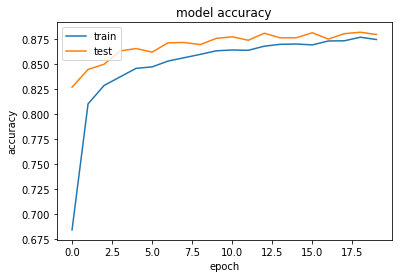

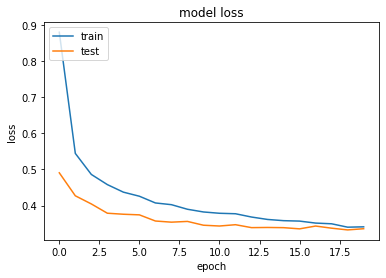

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
#evaluate the model
test_loss, test_acc = model_3.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3651 - accuracy: 0.8701
Test accuracy: 0.8701000213623047


In [35]:
model_3.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f018c37a2b0>>

In [36]:
model_3.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[ 0.00595373, -0.05876088, -0.12829556, ..., -0.05777584,
          0.24021274,  0.1812252 ],
        [-0.02437353, -0.02478566, -0.05831794, ..., -0.00448031,
          0.05394939,  0.17459363],
        [ 0.058743  , -0.05940138, -0.13595071, ...,  0.00775513,
          0.05065181, -0.05101523],
        ...,
        [ 0.05094571,  0.03154425,  0.1977669 , ..., -0.06045071,
         -0.04335425,  0.08437224],
        [ 0.07654614, -0.19332431,  0.33476388, ..., -0.0545299 ,
          0.21782556,  0.16012181],
        [ 0.02057359, -0.01520908,  0.07918079, ..., -0.06653364,
          0.1287533 ,  0.12749696]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(64,) dtype=float32, numpy=
 array([ 0.08213938,  0.16088147, -0.1382813 ,  0.16691533, -0.17150792,
        -0.01457836, -0.26247007, -0.0278434 , -0.0659909 , -0.00866102,
         0.04161929,  0.05681457,  0.06068777,  0.76240796,  0.1223

In [37]:
model_3.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 64,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_2',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constrai

###Improved Model 4: Increasing the number of Hidden Layer neuron 

In [38]:
#Most common type of model is a stack of layers
model_4 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_4.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_4.add(Dropout(0.3))
# Adding another dense layer:
model_4.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_4.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_4.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [39]:
# Compiling the model.
model_4.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
# Training the model. 
training = model_4.fit(X_train, Y_train, batch_size=128, epochs=31, validation_split=0.2) 


Epoch 1/31
375/375 [==============================] - 1s 3ms/step - loss: 0.5704 - accuracy: 0.7972 - val_loss: 0.4424 - val_accuracy: 0.8317
Epoch 2/31
375/375 [==============================] - 1s 3ms/step - loss: 0.4153 - accuracy: 0.8478 - val_loss: 0.3793 - val_accuracy: 0.8621
Epoch 3/31
375/375 [==============================] - 1s 3ms/step - loss: 0.3746 - accuracy: 0.8628 - val_loss: 0.3538 - val_accuracy: 0.8712
Epoch 4/31
375/375 [==============================] - 1s 3ms/step - loss: 0.3558 - accuracy: 0.8690 - val_loss: 0.3435 - val_accuracy: 0.8753
Epoch 5/31
375/375 [==============================] - 1s 3ms/step - loss: 0.3327 - accuracy: 0.8768 - val_loss: 0.3399 - val_accuracy: 0.8768
Epoch 6/31
375/375 [==============================] - 1s 3ms/step - loss: 0.3234 - accuracy: 0.8802 - val_loss: 0.3317 - val_accuracy: 0.8800
Epoch 7/31
375/375 [==============================] - 1s 3ms/step - loss: 0.3147 - accuracy: 0.8832 - val_loss: 0.3404 - val_accuracy: 0.8748
Epoch 

In [41]:
#evaluate the model_4
test_loss, test_acc = model_4.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3256 - accuracy: 0.8897
Test accuracy: 0.8896999955177307


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


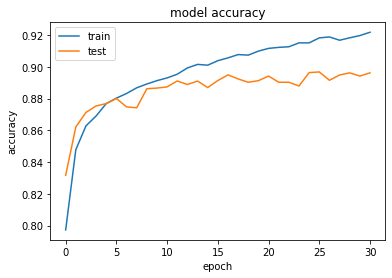

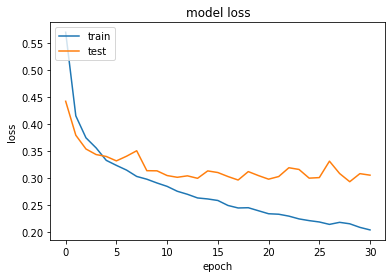

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
model_4.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f01845c97f0>>

In [44]:
model_4.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[ 0.01740886, -0.07091431, -0.03777235, ...,  0.11635311,
         -0.06439119,  0.03483502],
        [ 0.04995931, -0.05902574,  0.05912876, ..., -0.21963333,
         -0.06810291, -0.02993593],
        [-0.01195037,  0.04139318,  0.02906621, ..., -0.03165934,
         -0.08229507, -0.05264545],
        ...,
        [ 0.0120135 ,  0.04136909, -0.09424096, ..., -0.3572926 ,
          0.04362297,  0.09085532],
        [ 0.01948775, -0.15940858, -0.02284791, ..., -0.13724354,
         -0.0905838 , -0.10236778],
        [-0.01096983,  0.01560267,  0.04840547, ...,  0.06331504,
         -0.08012986, -0.09029619]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([ 1.77986652e-01,  2.05485895e-01, -2.72105765e-02,  3.81522328e-02,
         6.95817173e-02,  1.13319412e-01,  2.83868015e-01, -2.54890233e-01,
         7.96239525e-02, -1.55797722e-02,  2.09634289e-01, 

In [45]:
model_4.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 512,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_4',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constra

###Improved Model 5: Manipulating the batch size

In [46]:
#Most common type of model is a stack of layers
model_5 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_5.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_5.add(Dropout(0.3))
# Adding another dense layer:
model_5.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_5.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_5.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [47]:
# Compiling the model.
model_5.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
# Training the model. 
training = model_5.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2) 


Epoch 1/30
750/750 [==============================] - 2s 3ms/step - loss: 0.5512 - accuracy: 0.8006 - val_loss: 0.4081 - val_accuracy: 0.8539
Epoch 2/30
750/750 [==============================] - 2s 3ms/step - loss: 0.4144 - accuracy: 0.8481 - val_loss: 0.3802 - val_accuracy: 0.8600
Epoch 3/30
750/750 [==============================] - 2s 3ms/step - loss: 0.3838 - accuracy: 0.8601 - val_loss: 0.3708 - val_accuracy: 0.8613
Epoch 4/30
750/750 [==============================] - 2s 3ms/step - loss: 0.3596 - accuracy: 0.8659 - val_loss: 0.3413 - val_accuracy: 0.8784
Epoch 5/30
750/750 [==============================] - 2s 3ms/step - loss: 0.3464 - accuracy: 0.8726 - val_loss: 0.3355 - val_accuracy: 0.8780
Epoch 6/30
750/750 [==============================] - 2s 3ms/step - loss: 0.3281 - accuracy: 0.8789 - val_loss: 0.3292 - val_accuracy: 0.8805
Epoch 7/30
750/750 [==============================] - 2s 3ms/step - loss: 0.3237 - accuracy: 0.8808 - val_loss: 0.3153 - val_accuracy: 0.8845
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


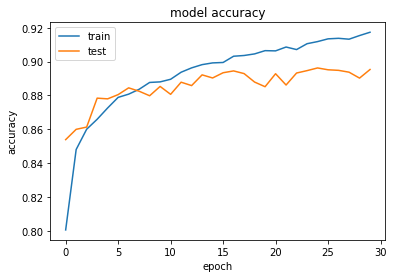

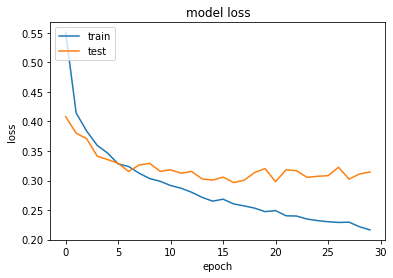

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
#evaluate the model
test_loss, test_acc = model_5.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3466 - accuracy: 0.8887
Test accuracy: 0.888700008392334


In [51]:
model_5.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f0184413320>>

In [52]:
model_5.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[ 0.05325742, -0.1739157 ,  0.02005552, ..., -0.03071494,
         -0.04413032, -0.00571972],
        [-0.00195733, -0.16733815, -0.03907   , ..., -0.04399994,
         -0.0321722 ,  0.00921904],
        [ 0.05617949,  0.38485718,  0.02752605, ..., -0.09438211,
         -0.057304  ,  0.02512472],
        ...,
        [-0.01797825,  0.11096482, -0.01186688, ..., -0.15242255,
         -0.04235105, -0.08437037],
        [-0.06265804,  0.42246526, -0.00175972, ..., -0.08984721,
         -0.0032949 ,  0.03146934],
        [-0.04941471, -0.1661979 ,  0.04201775, ..., -0.03135542,
         -0.07028707, -0.00463628]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([-0.02124102, -0.34962487,  0.03500544, -0.16573167,  0.05168225,
         0.14510709, -0.00737184,  0.09733006,  0.17237763,  0.45392537,
         0.00859184, -0.2009366 , -0.2797821 ,  0.09491152,  0.12

In [53]:
model_5.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 512,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_6',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constra

###Improved Model 6: Adding Another Hidden Layer to the Model

In [54]:
import tensorflow as tf

#In Keras, layers are assembled to build models 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_6 = tf.keras.Sequential()
N_hidden = 512

# Adds a densely-connected layer with 64 units to the model:
model_6.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_3', activation='relu'))
model_6.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_6.add(Dense(10, name='dense_layer_4', activation = 'softmax'))


In [55]:
# Compiling the model.
model_6.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
# Training the model. 
training = model_6.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2) 

Epoch 1/30
750/750 [==============================] - 2s 3ms/step - loss: 0.5819 - accuracy: 0.7889 - val_loss: 0.4209 - val_accuracy: 0.8439
Epoch 2/30
750/750 [==============================] - 2s 3ms/step - loss: 0.4388 - accuracy: 0.8427 - val_loss: 0.3837 - val_accuracy: 0.8586
Epoch 3/30
750/750 [==============================] - 2s 3ms/step - loss: 0.4002 - accuracy: 0.8547 - val_loss: 0.3706 - val_accuracy: 0.8648
Epoch 4/30
750/750 [==============================] - 2s 3ms/step - loss: 0.3800 - accuracy: 0.8605 - val_loss: 0.3585 - val_accuracy: 0.8671
Epoch 5/30
750/750 [==============================] - 2s 3ms/step - loss: 0.3629 - accuracy: 0.8675 - val_loss: 0.3505 - val_accuracy: 0.8686
Epoch 6/30
750/750 [==============================] - 2s 3ms/step - loss: 0.3512 - accuracy: 0.8724 - val_loss: 0.3557 - val_accuracy: 0.8736
Epoch 7/30
750/750 [==============================] - 2s 3ms/step - loss: 0.3438 - accuracy: 0.8731 - val_loss: 0.3364 - val_accuracy: 0.8756
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


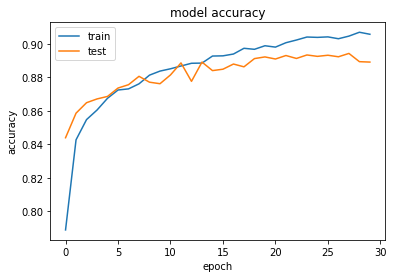

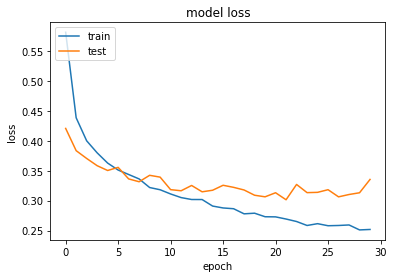

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [58]:
#evaluate the model
test_loss, test_acc = model_6.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3616 - accuracy: 0.8828
Test accuracy: 0.8827999830245972


In [59]:
model_6.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f01fb41bd30>>

In [60]:
model_6.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.05564674,  0.09954851,  0.01491546, ...,  0.03426062,
          0.09221672, -0.03009646],
        [-0.06057526, -0.09160586, -0.06373989, ...,  0.08413176,
         -0.04474327, -0.14385301],
        [-0.04689886,  0.47389907, -0.08127383, ..., -0.15397301,
         -0.42324036, -0.01624612],
        ...,
        [-0.06698845,  0.03870273,  0.16721906, ..., -0.04839433,
          0.25362238, -0.08191445],
        [ 0.02606384,  0.16855848,  0.07267393, ...,  0.04687366,
         -0.11537674,  0.09253814],
        [ 0.03074555,  0.04645803,  0.0281132 , ...,  0.0589746 ,
          0.06110878, -0.01083589]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([-2.21943446e-02,  3.97459835e-01,  8.52097273e-02,  3.09309792e-02,
        -3.86839837e-01,  1.71419621e-01,  1.57064110e-01, -2.10683197e-02,
        -2.19002753e-01,  7.12253898e-02,  2.50132084e-01, 

In [61]:
model_6.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 512,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_8',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constra

# DIY: Assignment

####**Total Marks: 50**
**Duration: 6 days**

As a part of this assignment following are the list of task that may help  improve your skills with TensorFlow. It is important to get hands-on experience with TensorFlow in order to learn how to use it properly.

You may want to backup this Notebook before making any changes.


###**`.ipynb file 1`** 


**Marks: 10**
- Do you get the exact same results if you run the Notebook multiple times without changing any parameters?

> Yes, without changing the parameters, I get the same results.


- What is the effect of adding more neurons to each hidden layer?

> Over the epochs, the accuracy on the test data increases by 1% but the loss is minimized faster and remains fairly constant as accuracy increases in Model 4 (hidden layer with more neurons). In Model 1, the loss  is minimized rapidly as accuracy increases on Model 1 (hidden layer with less neurons).

> Also, the accuracy on the training set is higher than the test set for both Model 1 and 4. The loss is minimized more for the training set than the test set for both models over the epochs. This indicates that the model is overfitting the data.

- What happens if we manipulate the value of dropout?

> The accuracy on the testing set is now higher than the training set and the loss is minimized on the testing set relative to the training set, indicating that there is no overfitting.


- What is the effect of adding more hidden layer to the network?

> There is no minimization of loss over the epochs and accuracy is better on the training data compared to the testing data, indicating overfitting.

- What is the accuracy score if we use RMSprop for model 6?

> Accuracy score is 0.9848 if RMSprop is used as the optimizer compared to Adam (accuracy: 0.9842). In this case, the loss grows over the epochs for the test data.


- Does manipulating the learning rate affect the model? Justify your answer.

> Yes. Adjusting the learning rate causes the weights and biases to be adjusted which will affect the model accuracy, overfitting and speed.

- What is the best parameter configuration for this project?

> Model 6 parameters result in the best model. 





###**`.ipynb file 2`** 


In [17]:
import tensorflow as tf
from tensorflow import keras 

# Loading MNIST dataset
mnist = keras.datasets.mnist 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [18]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

In [19]:
# X_train is 60000 rows of 28x28 values; we reshape it to # 60000 x 784. 
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED) 
X_test = X_test.reshape(10000, RESHAPED) 

# Data is converted into float32 to use 32-bit precision # when training a neural network 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

# Normalizing the input to be within the range [0,1]
X_train /= 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255
print(X_train.shape[0], 'train samples') 
print(X_test.shape[0], 'test samples') 

# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, 10) 
Y_test = tf.keras.utils.to_categorical(Y_test, 10)


60000 train samples
10000 test samples


In [20]:
from tensorflow.keras import Sequential
import tensorflow as tf

#In Keras, layers are assembled to build models 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_7 = tf.keras.Sequential()
N_hidden = 512

# Adds a densely-connected layer with 64 units to the model:
model_7.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_7.add(Dropout(0.3))

# Adding another dense layer:
model_7.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_7.add(Dropout(0.3))

# Adding another dense layer:
model_7.add(Dense(N_hidden, name='dense_layer_3', activation='relu'))
model_7.add(Dropout(0.3))

# Adding another dense layer:
model_7.add(Dense(N_hidden, name='dense_layer_4', activation='relu'))
model_7.add(Dropout(0.3))

# Adding another dense layer:
model_7.add(Dense(N_hidden, name='dense_layer_5', activation='relu'))
model_7.add(Dropout(0.3))

# Adding another dense layer:
model_7.add(Dense(N_hidden, name='dense_layer_6', activation='relu'))
model_7.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_7.add(Dense(10, name='dense_layer_7', activation = 'softmax'))

In [21]:
# Compiling the model.
model_7.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# Training the model.
training = model_7.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2) 

Epoch 1/30
750/750 [==============================] - 3s 3ms/step - loss: 2.0632 - accuracy: 0.2592 - val_loss: 1.0741 - val_accuracy: 0.6530
Epoch 2/30
750/750 [==============================] - 3s 3ms/step - loss: 0.9281 - accuracy: 0.6808 - val_loss: 0.4292 - val_accuracy: 0.8714
Epoch 3/30
750/750 [==============================] - 3s 4ms/step - loss: 0.5556 - accuracy: 0.8251 - val_loss: 0.3004 - val_accuracy: 0.9102
Epoch 4/30
750/750 [==============================] - 2s 3ms/step - loss: 0.4243 - accuracy: 0.8699 - val_loss: 0.2380 - val_accuracy: 0.9282
Epoch 5/30
750/750 [==============================] - 2s 3ms/step - loss: 0.3493 - accuracy: 0.8965 - val_loss: 0.2058 - val_accuracy: 0.9384
Epoch 6/30
750/750 [==============================] - 3s 3ms/step - loss: 0.3006 - accuracy: 0.9095 - val_loss: 0.1792 - val_accuracy: 0.9462
Epoch 7/30
750/750 [==============================] - 2s 3ms/step - loss: 0.2618 - accuracy: 0.9222 - val_loss: 0.1618 - val_accuracy: 0.9535
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


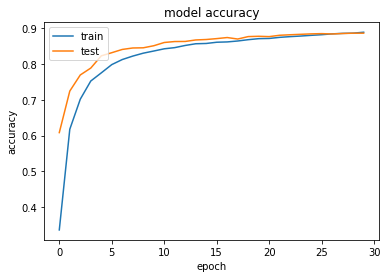

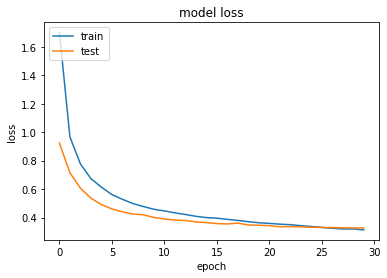

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [66]:
#evaluate the model
test_loss, test_acc = model_7.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3562 - accuracy: 0.8773
Test accuracy: 0.8773000240325928


I improved the model by adding an additional hidden layer to the model. The loss is reduced and the test accuracy is higher than the train accuracy.

**Marks: 15**
>- Try improving the model and re-code the program from scratch without looking too much at this source-code.
- Write up a summary explaining how your program works.


###**`.ipynb file 3`**



**Marks: 25**
>**Problem Statement**<br>
The dataset is similar to MNIST, but includes images of certain clothing and accessory. The objective is to classify images into specific classes using single layer perceptron and multilayer perceptron.<br>
<br>
**Dataset Description**
- Total Images: 70,000 
- Train Images: 60,000 
- Test Images: 10,000 
- Image Size: 28 X 28 
- Classes: 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot' 

>**Tasks to be Performed:**
As a part of this assignment you will be performing the following tasks:
- Prepare a detailed python notebook(similar to this one) using muli-layer perceptron for classifing the images from [MNIST Fashion Dataset ](https://github.com/zalandoresearch/fashion-mnist) with best accuracy
- Prepare the dataset for the model
- Develop Single Layer Perceptron model for classifying the handwritten digits
- Plot the change in accuracy per epochs
- Evaluate the model on the testing data
- Analyse the model summary
- Add hidden layer to the model to make it Multi-Layer Perceptron
- Add Dropout to prevent overfitting and check its effect on accuracy
- Increasing the number of Hidden Layer neuron and check its effect on accuracy
- Use different optimizers and check its effect on accuracy
- Increase the hidden layers and check its effect on accuracy
- Manipulate the batch_size and epochs and check its effect on accuracy

**Answer:** What parameters should be choosen to get best accuracy on classifying the images into various categories?
 


> **Parameters of Model 4 had the best accuracy in classification:**
- Number of hidden layers = 512
- Number of dense layers: 3
- Optimizer: Adam
- Epochs: 31
- Batch Size: 128
- Validation Split: 0.2
